In [2]:
# import matplotlib.font_manager as font_manager
# font_dir = ['/dir/with/fonts/Arial']
# for font in font_manager.findSystemFonts(font_dir):
#     font_manager.fontManager.addfont(font)

# mpl.rcParams['font.family'] = 'Helvetica'

# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['PT Sans']})
# rc('font',**{'family':'sans-serif'})

In [3]:
# import matplotlib.font_manager
# from IPython.core.display import HTML

# def make_html(fontname):
#     return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

# code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

# HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [1]:
# Standard Python modules
import os, sys
%matplotlib inline

# import personal modules
sys.path.append('../')
from ar_landfall_tool_contour import landfall_tool_contour
from ar_landfall_tool_vector import landfall_tool_vector
from ar_landfall_tool_IVT_mag import landfall_tool_IVT_magnitude
from cw3e_tools import load_datasets




# pd.options.display.float_format = "{:,.2f}".format # makes it so pandas tables display only first two decimals

SyntaxError: unmatched ')' (ar_landfall_tool_vector.py, line 555)

In [ ]:
model='W-WRF'

if (model == 'ECMWF') | (model == 'GEFS'):
    loc_lst = ['US-west']*3 + ['SAK']*3 + ['AK']*2
    ori_lst = ['latitude']*3 + ['longitude']*3 + ['latitude']*2
    ptloc_lst = ['coast', 'foothills', 'inland']*2 + ['coast', 'inland']

elif (model == 'ECMWF-GEFS') | (model == 'W-WRF'):
    loc_lst = ['US-west']*3 
    ori_lst = ['latitude']*3 
    ptloc_lst = ['coast', 'foothills', 'inland']

threshold_lst = [150, 250, 500, 750]

# for each model and point location, load the data, then calculate each metric
for i, (loc, ori, ptloc) in enumerate(zip(loc_lst, ori_lst, ptloc_lst)):
    print(loc, ori, ptloc)

In [ ]:
%%time

model = 'GEFS'
loc = 'US-west'
ptloc = 'intwest'
fname='/data/downloaded/SCRATCH/cw3eit_scratch/GEFS/FullFiles/IVT_Full_2023100200.nc'
ori = 'latitude'

if model == 'ECMWF-GEFS':   
    s = load_datasets('ECMWF', loc, ptloc)
    ds_pt_ECMWF, ds_ECMWF = s.calc_ivt_vars()
    model_init_date = ds_pt_ECMWF.model_init_date
    date_string = model_init_date.strftime('%Y%m%d%H')
    path_to_data = '/data/downloaded/SCRATCH/cw3eit_scratch/'
    fname = path_to_data + 'GEFS/FullFiles/IVT_Full_{0}.nc'.format(date_string)
    
    s = load_datasets('GEFS', loc, ptloc)
    ds_pt_GEFS, ds_GEFS = s.calc_ivt_vars()
    
    ## subtract ECMWF - GEFS
    ds_pt = ds_pt_ECMWF-ds_pt_GEFS
    ds = ds_ECMWF-ds_GEFS
    
    ## Add attribute information
    ds_pt = ds_pt.assign_attrs(model_init_date=model_init_date)
    
else:
    s = load_datasets(model, loc, ptloc)
    ds_pt, ds = s.calc_ivt_vars()

if model == 'ECMWF' or model == 'GEFS':
    prec = s.load_prec_QPF_dataset()

In [6]:
%%time
s = landfall_tool_contour(ds_pt=ds_pt, loc=loc, ptloc=ptloc, forecast=model, threshold=150, orientation=ori)
s.create_figure()

CPU times: user 13.4 s, sys: 7.84 s, total: 21.2 s
Wall time: 20.1 s


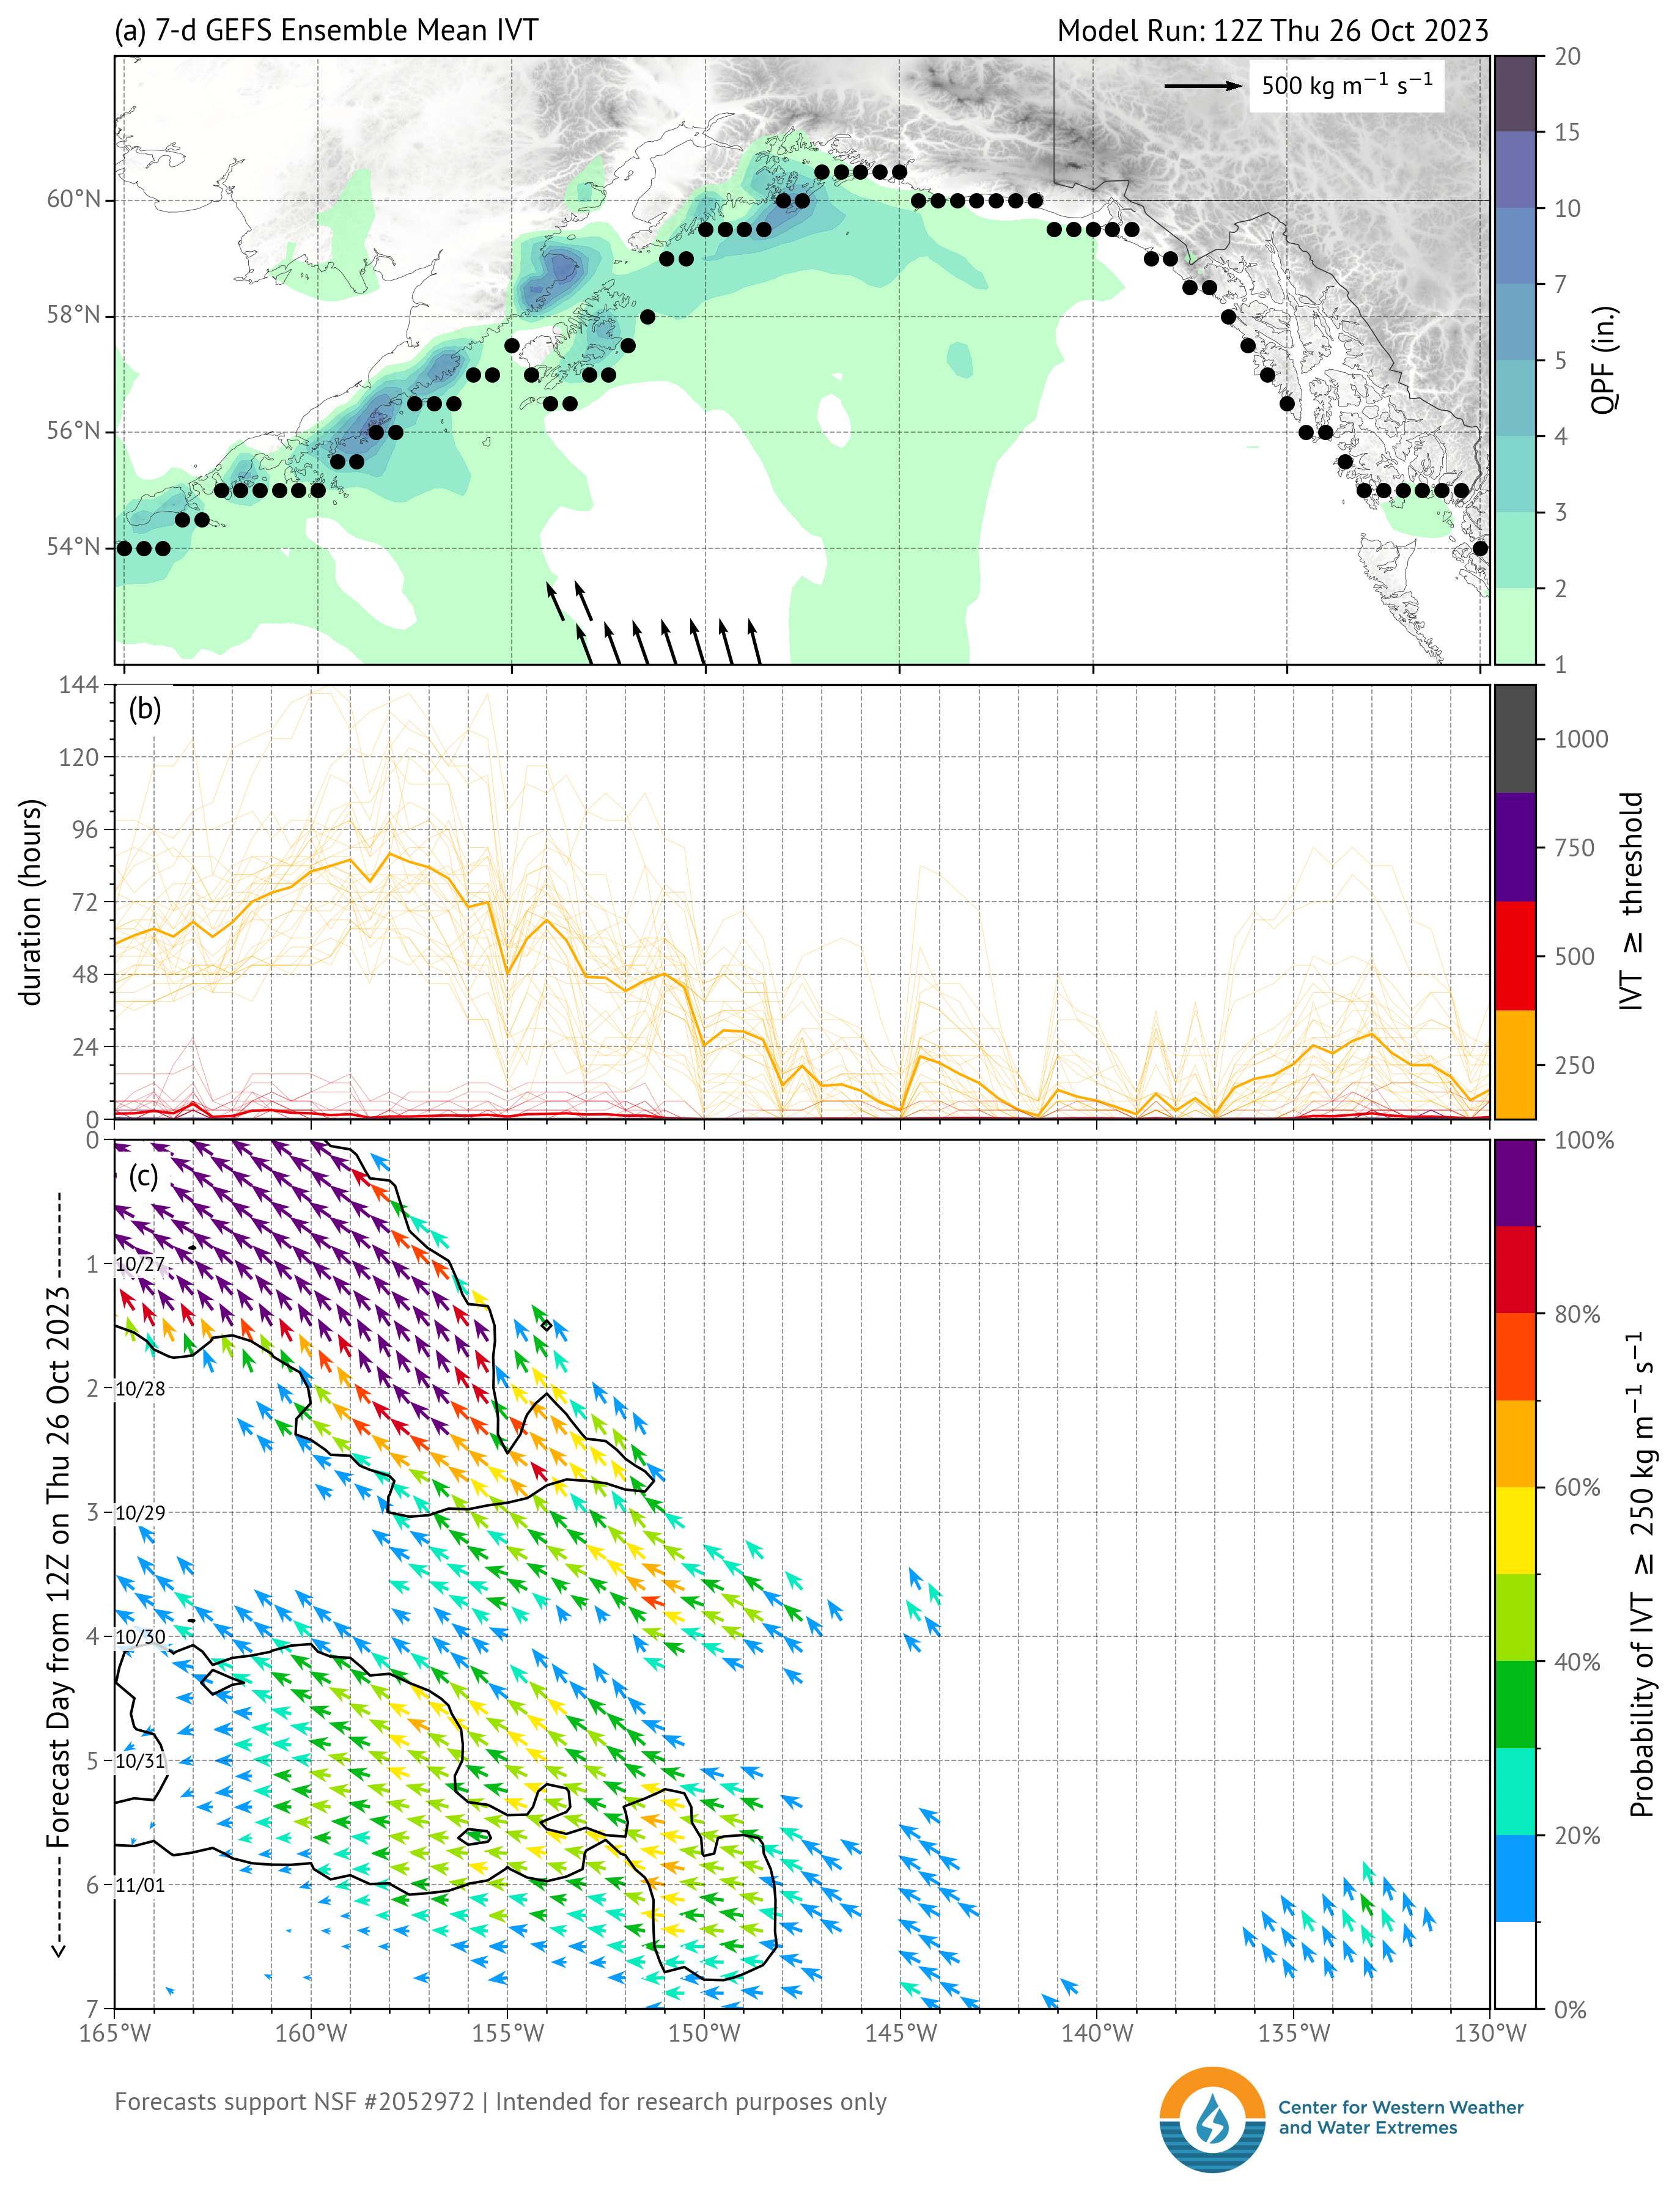

CPU times: user 50.4 s, sys: 11 s, total: 1min 1s
Wall time: 52.6 s


In [16]:
%%time
s = landfall_tool_vector(ds_pt=ds_pt, ds=ds, prec=prec, loc=loc, ptloc=ptloc, forecast=model, threshold=250, orientation=ori)
s.create_figure()

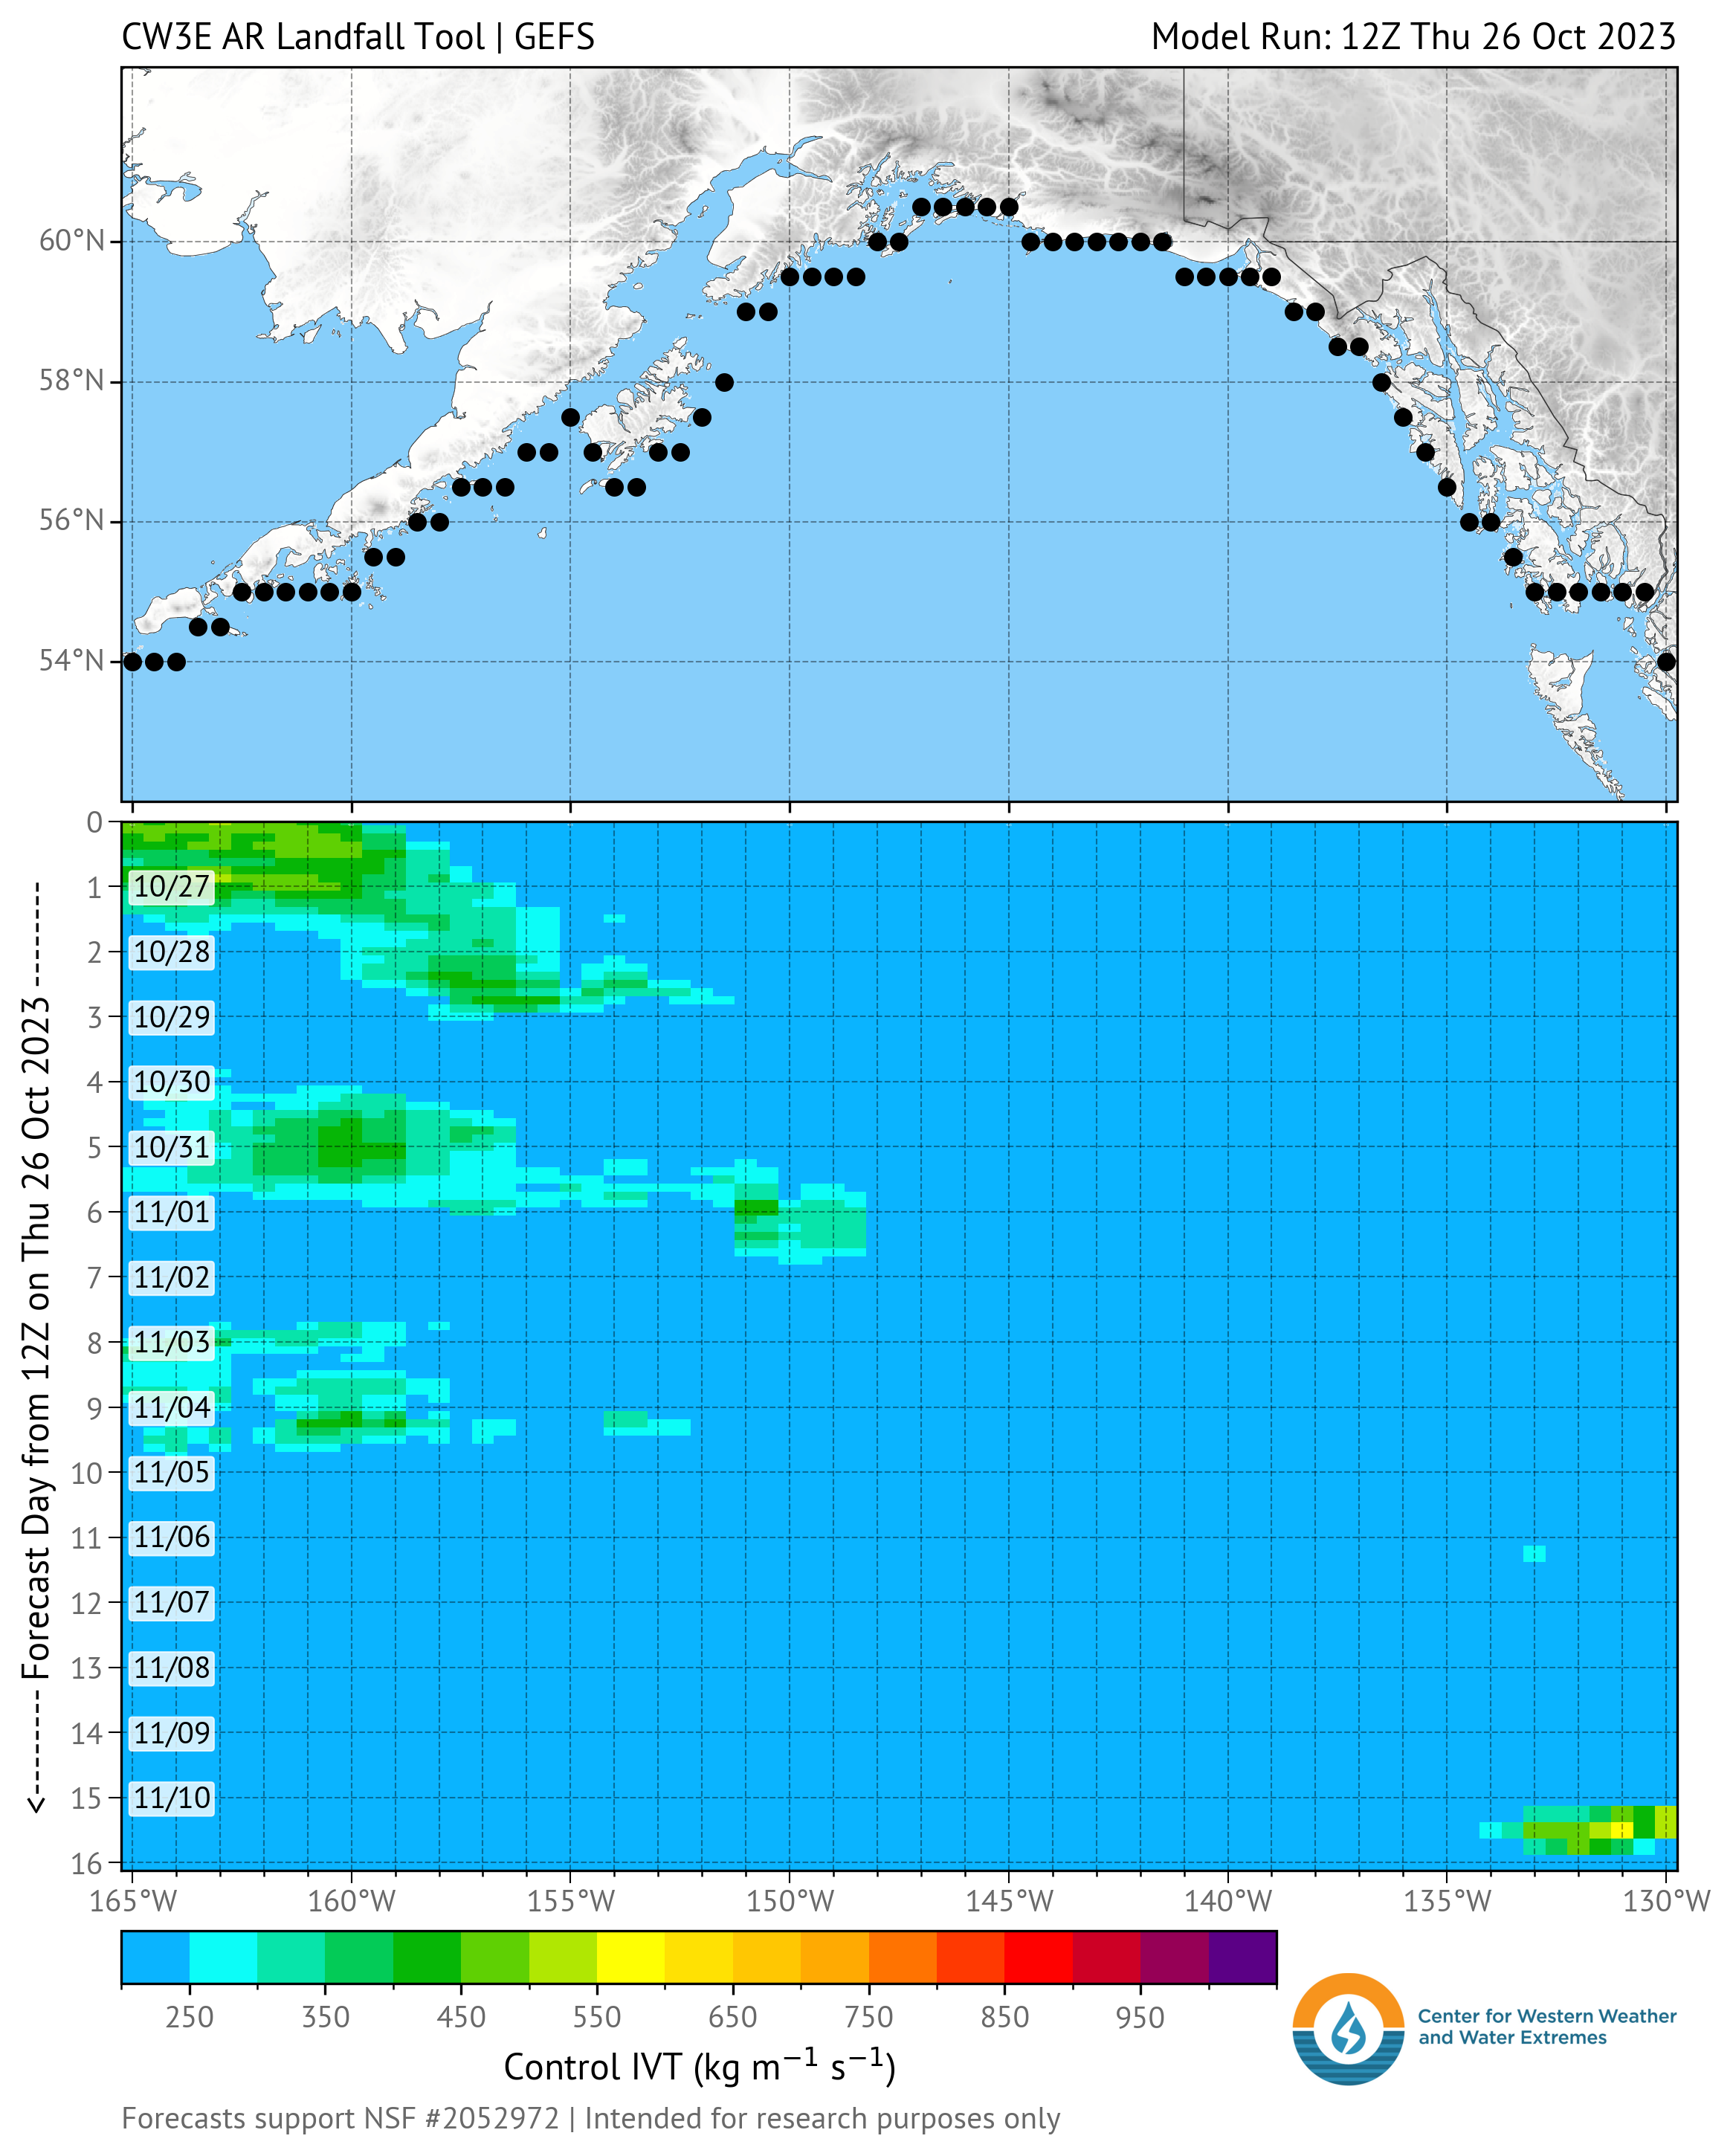

CPU times: user 12.4 s, sys: 6.28 s, total: 18.6 s
Wall time: 16.9 s


In [33]:
%%time
s = landfall_tool_IVT_magnitude(ds_pt=ds_pt, loc=loc, ptloc=ptloc, forecast=model, mag_type='control', orientation=ori)
s.create_figure()

In [4]:
loc = 'US-West'
ori = 'latitude'
model_lst = ['GEFS', 'ECMWF', 'W-WRF', 'ECMWF-GEFS']
ptloc_lst = ['coast', 'foothills', 'inland']
threshold_lst = [150, 250, 500, 750]

# for each model and point location, load the data, then calculate each metric
for i, (model, ptloc) in enumerate(zip(model_lst, ptloc_lst)):
    
    ################################
    ### Create Intermediate Data ###
    ################################
    ## load the data - this loads and calculates for all metrics and IVT thresholds for the given model and pt location
    s = load_datasets(model, loc, ptloc)
    ds_pt, ds = s.calc_ivt_vars()
    
    if model == 'ECMWF' or model == 'GEFS':
        prec = s.load_prec_QPF_dataset()
    
    ##########################################
    ### Create Plots for Intermediate Data ###
    ##########################################
    ## plot control magnitude plots (this doesn't need to loop through thresholds)
    s = landfall_tool_IVT_magnitude(ds_pt=ds_pt, loc=loc, ptloc=ptloc, forecast=model, mag_type='control', orientation=ori)
    s.create_figure()
    
    ## plot ensemble mean magnitude plots (this doesn't need to loop through thresholds)
    s = landfall_tool_IVT_magnitude(ds_pt=ds_pt, loc=loc, ptloc=ptloc, forecast=model, mag_type='ensemble_mean', orientation=ori)
    s.create_figure()
    
    ## plot vector and contour landfall plots (this will loop through all the thresholds)
    for j, thres in enumerate(threshold_lst):
        s = landfall_tool_contour(ds_pt=ds_pt, loc=loc, ptloc=ptloc, forecast=model, threshold=thres, orientation=ori)
        s.create_figure()
        
        if model == 'ECMWF' or model == 'GEFS':
            s = landfall_tool_vector(ds_pt=ds_pt, ds=ds, prec=prec, loc=loc, ptloc=ptloc, forecast=model, threshold=thres, orientation=ori)
            s.create_figure()

<xarray.Dataset>
Dimensions:        (forecast_hour: 105, location: 75, ensemble: 31, threshold: 4)
Coordinates:
  * forecast_hour  (forecast_hour) float32 0.0 3.0 6.0 9.0 ... 372.0 378.0 384.0
    lat            (location) float32 60.0 59.5 59.0 58.5 ... 26.0 25.5 25.0
    lon            (location) float32 -140.0 -139.5 -138.5 ... -112.0 -112.0
  * ensemble       (ensemble) int32 0 1 2 3 4 5 6 7 ... 23 24 25 26 27 28 29 30
  * threshold      (threshold) float64 150.0 250.0 500.0 750.0
Dimensions without coordinates: location
Data variables:
    ensemble_mean  (forecast_hour, location) float32 170.4 277.1 ... 75.73 81.16
    control        (forecast_hour, location) float32 171.0 278.7 ... 15.06 26.43
    v              (forecast_hour, location) float32 0.9272 0.9011 ... -0.1995
    u              (forecast_hour, location) float32 0.3644 0.4213 ... 0.6068
    duration       (threshold, ensemble, location) int64 33 126 174 ... 15 18 12

In [ ]:
%%time
# date = '20230711' # today's date
# hr = '06' # time start
# url = 'https://nomads.ncep.noaa.gov/dods/gfs_0p25/gfs{0}/gfs_0p25_{1}z'.format(date, hr)
# ds = xr.open_dataset(url, decode_times=True)
# ds = ds.isel(time=7*8) # select day 7
# prec = ds['apcpsfc'].sum('time')/25.4 # convert from mm to in
# prec

# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([-130., -110., 25., 55.])
# cmap, norm, bnds = cw3e.cmap('brian_qpf')
# prec.plot.contourf(ax=ax, cmap=cmap, levels=bnds, norm=norm, extend='max', transform=ccrs.PlateCarree())
# ax.coastlines()

In [ ]:
# ds = xr.open_dataset('/data/downloaded/WWRF-NRT/2023-2024/Ensemble_IVT/IVT_WWRF_2023092200.nc')
# ds

In [ ]:
ds = xr.open_dataset('../preprocess/precip.grb', engine='cfgrib')